### Forescasting

#### Exploring data

In [812]:
#Data structures
import pandas as pd
import numpy as np
import datetime as dt

#plotting
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

#Profiling
from pandas_profiling import ProfileReport

#Statistics
import math
import scipy as sp
import statsmodels.api as sm
from sklearn import preprocessing, metrics
#Forecasting
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.graphics.gofplots import qqplot
import pyflux as pf
from pmdarima.arima import auto_arima
import pyrenn as prn

In [2]:
datapath='../data/IoTData.csv'
timestampcolumn = 'DATETIME'
df = pd.read_csv(datapath, index_col=False, parse_dates=[timestampcolumn])

In [3]:
df.head(10)

,DATETIME,TEMP_AIR,UMIDADE_REL,KW,KW2
0,2019-09-15 00:00:00,18.7,80.0,690.48,69.048
1,2019-09-15 01:00:00,18.2,83.0,685.44,68.544
2,2019-09-15 02:00:00,18.2,83.0,656.88,65.688
3,2019-09-15 03:00:00,18.2,83.0,655.20,65.520
4,2019-09-15 04:00:00,18.3,82.0,660.24,66.024
5,2019-09-15 05:00:00,18.3,81.0,630.00,63.000
6,2019-09-15 06:00:00,18.4,81.0,609.84,60.984
7,2019-09-15 07:00:00,18.0,83.0,608.16,60.816
8,2019-09-15 08:00:00,18.7,80.0,596.40,59.640
9,2019-09-15 09:00:00,20.7,70.0,483.84,48.384


In [4]:
f"data ranges from from {df['DATETIME'].values[0]} to {df['DATETIME'].values[-1]}"

'data ranges from from 2019-09-15T00:00:00.000000000 to 2020-08-31T20:00:00.000000000'

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report for IoTData")
profile.to_file("../output/bp_profile.html")

In [6]:
profile.to_widgets()

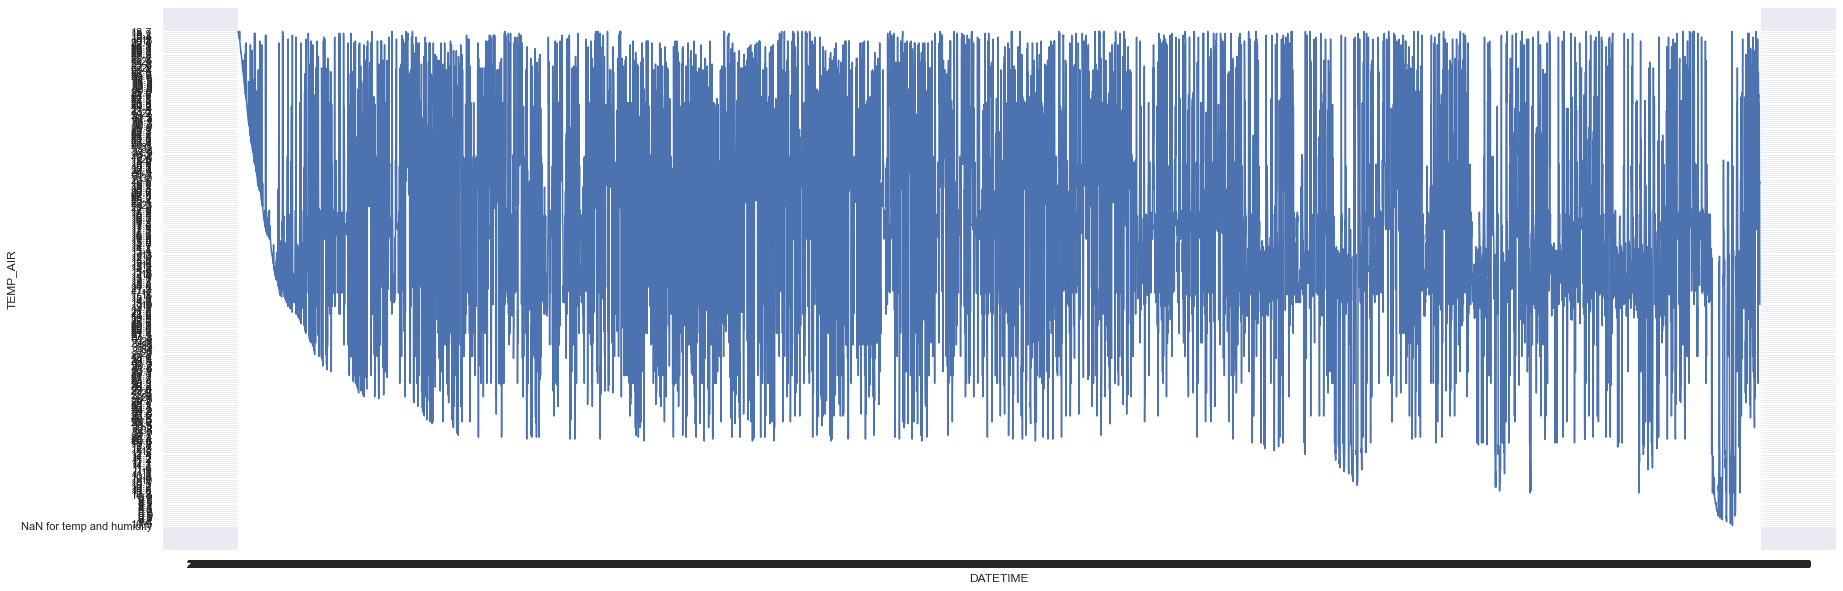

In [12]:
plot_size = (30, 10)
fig, ax = plt.subplots(figsize=plot_size)
sns.lineplot(x='DATETIME', y='TEMP_AIR', data=df)

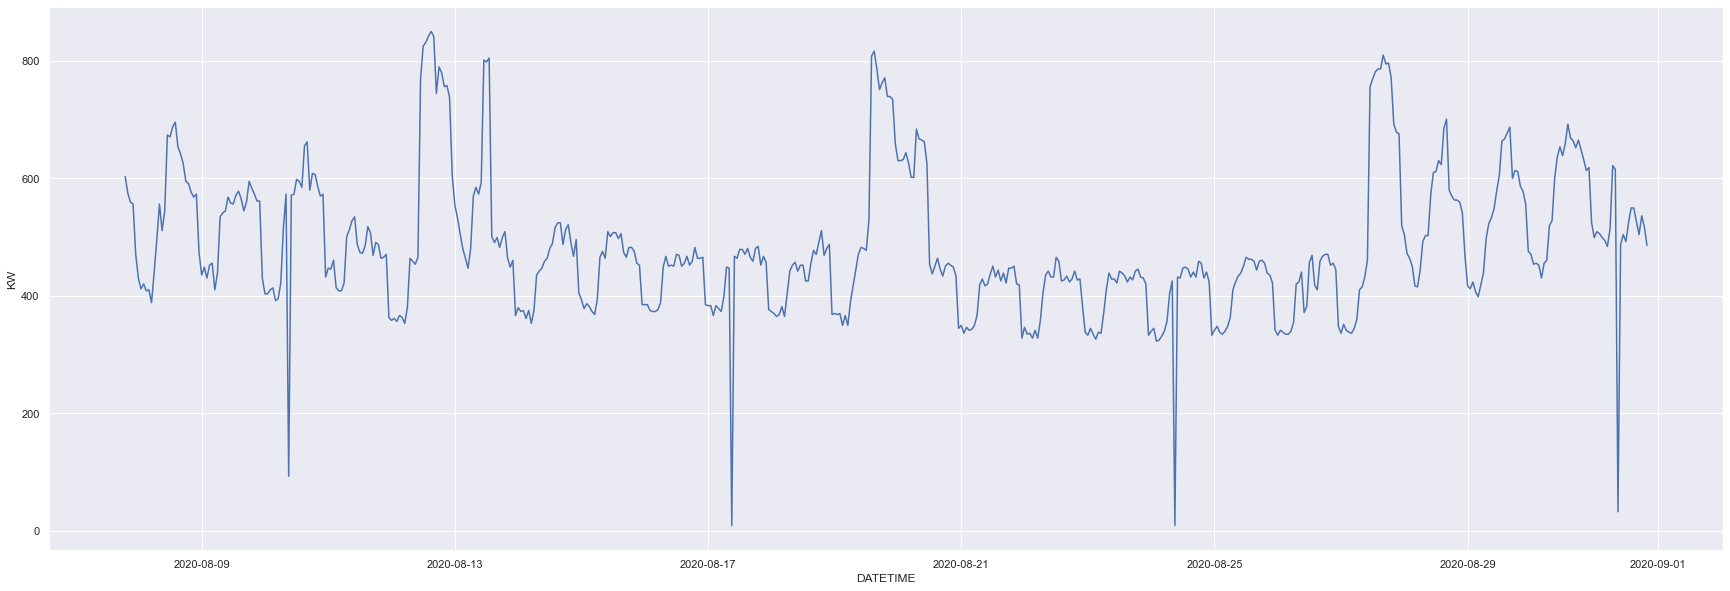

In [234]:
plot_size = (30, 10)
fig, ax = plt.subplots(figsize=plot_size)
sns.lineplot(x='DATETIME', y='KW', data=df[-24*24:])

In [9]:
df_noMonday = df[df.DATETIME.dt.weekday != 0]

0.6740040628844488

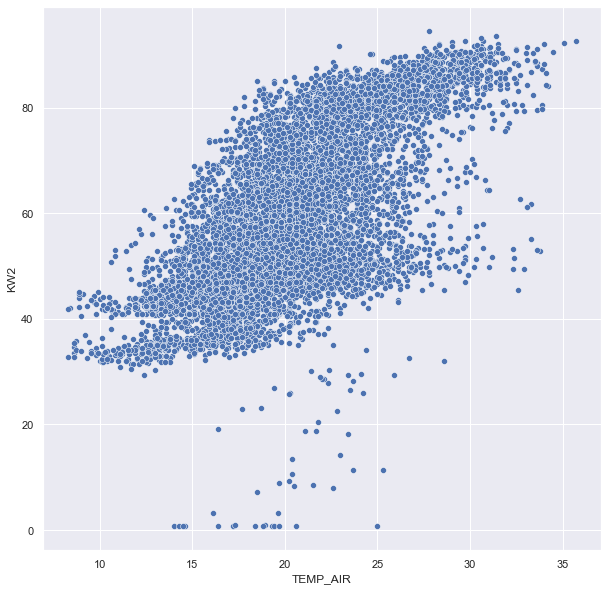

In [10]:
plot_size = (10, 10)
fig, ax = plt.subplots(figsize=plot_size)
sns.scatterplot(x='TEMP_AIR', y='KW2', data=df)

df['TEMP_AIR'].corr(df['KW2'])

-0.3490486381551918

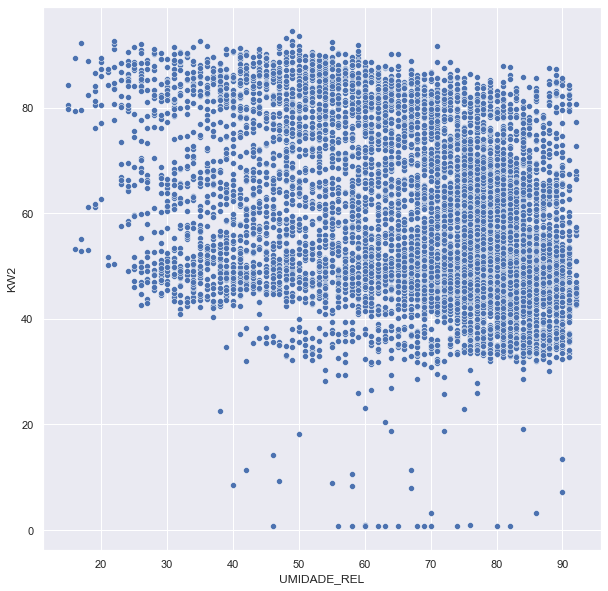

In [1026]:
plot_size = (10, 10)
fig, ax = plt.subplots(figsize=plot_size)
sns.scatterplot(x='UMIDADE_REL', y='KW2', data=df)

df['UMIDADE_REL'].corr(df['KW2'])

0.679242302614031

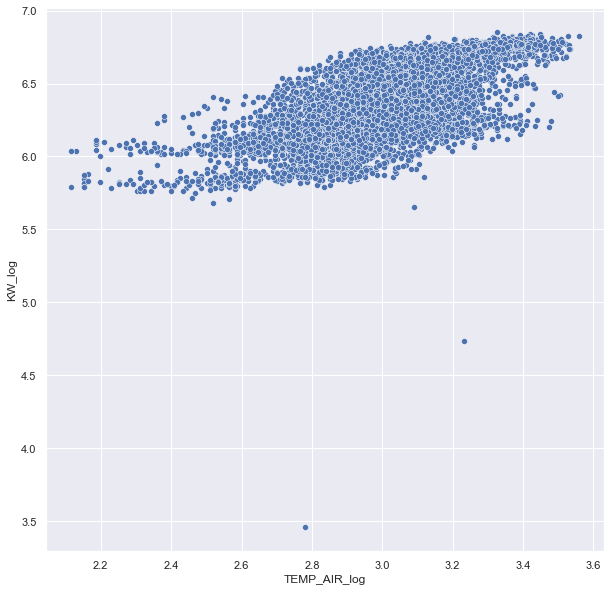

In [858]:
plot_size = (10, 10)
fig, ax = plt.subplots(figsize=plot_size)
sns.scatterplot(x='TEMP_AIR', y='KW_log', data=df_noMonday)
df_noMonday['TEMP_AIR'].corr(df_noMonday['KW'])

Brazil winter in June to September
cooler tempeartures seem to correspond to lower energy usage
why are  there so many drastic drops in kw?

the 8.40 doesn't make sense?
is kw the energy usage every hour? kwh? what's the unit
```
25  2019-09-16 07:00:00	20.1	76.0	451.92	45.192
26	2019-09-16 08:00:00	21.8	69.0	485.52	48.552
27	2019-09-16 09:00:00	25.0	58.0	8.40	0.840
28	2019-09-16 10:00:00	26.9	47.0	488.88	48.888
29	2019-09-16 11:00:00	29.9	39.0	483.84	48.384
30	2019-09-16 12:00:00	32.6	28.0	455.28	45.528
```
We've about 50 Monday and every Monday at 9am the kwh drops - why? Will this affect the model

```
2019 Septempber 16 Monday at 9am
2019 September 23 Monday at 9am
2019 September 30 Monday at 9am
2019 October 7 Monday at 9am
2019 October 14 Monday at 9am

2020 August 3 Monday at 9am
2020 August 10 Monday at 9am
2020 August 17 Monday at 9am
2020 August 24 Monday at 9am
2020 August 31 Monday at 9am
```

February Outlier Tuesday
```
2020-02-04 08:00:00	20.5	89.0	546.000000	54.600000
2020-02-04 09:00:00	22.0	84.0	285.600007	28.560001
2020-02-04 10:00:00	23.1	74.0	468.720002	46.872000
```

June Outlier Wednesday
```
2020-06-02 21:00:00	15.9	88.0	470.399994	47.039999
2020-06-03 08:00:00	16.1	86.0	31.920001	3.192000
2020-06-03 09:00:00	17.6	78.0	463.679993	46.367999
```

cutoff=  10.0  hours


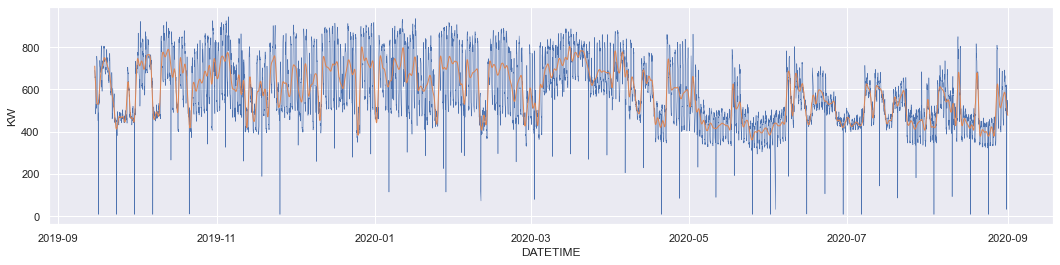

In [452]:
# Visualizing the original and the Filtered Time Series
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(df['DATETIME'],df['KW'],lw=0.5)
## Filtering of the time series
fs=1/3600 #1 hour in Hz (sampling frequency)

nyquist = fs / 2 # 0.5 times the sampling frequency
cutoff=0.05 # fraction of nyquist frequency, here  it is 5 hours
print('cutoff= ',1/cutoff*nyquist*3600,' hours') #cutoff=  5  hours
b, a = sp.signal.butter(5, cutoff, btype='lowpass') #low pass filter


df['KW_filt'] = sp.signal.filtfilt(b, a, df['KW'])

sns.lineplot(df['DATETIME'],df['KW_filt'],linewidth=1)

#### Markus's Notebook logic

Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

(7134,)


Text(0.5, 1.0, 'original')

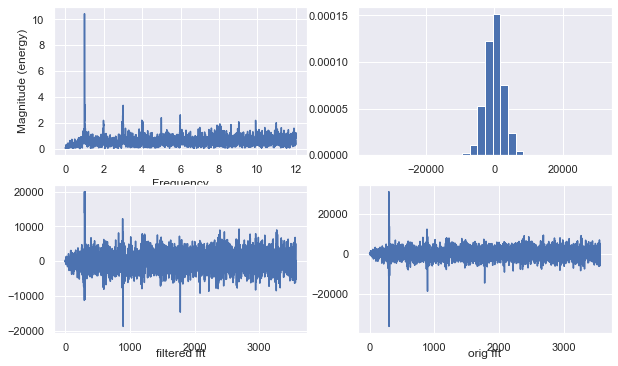

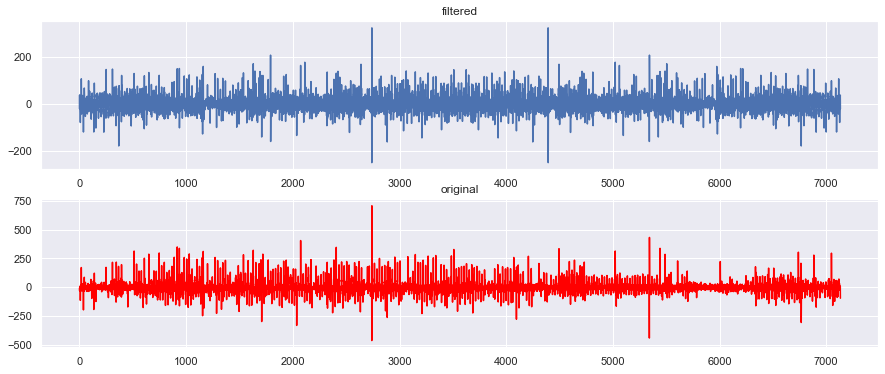

In [456]:
# seasonality - once a day stands out, every 3 days
ndif_ = np.diff(df_noMonday['KW'])
ndif_fft = sp.fft.rfft(ndif_).real

print (ndif_.shape)
fig, ax = plt.subplots(2,2,figsize=(10,6))
spectrum,_,_ = ax[0,0].magnitude_spectrum(ndif_, Fs=24)
t = ax[0,1].hist(ndif_fft, bins=30, density=True)
ax[1,0].set_title('histogram freq')

ndif_filt_fft = np.where(np.abs(ndif_fft) > 20000, 20000, ndif_fft)

ndif2 = sp.fft.irfft(ndif_filt_fft)
ndif2_nonfilt = sp.fft.irfft(ndif_fft)

t = ax[1,0].plot(ndif_filt_fft)
ax[1,0].set_title('filtered fft', y=-0.2)

t = ax[1,1].plot(ndif_fft)
ax[1,1].set_title('orig fft', y=-0.2)

fig, ax = plt.subplots(2,1,figsize=(15,6), squeeze=False)
t = ax[0,0].plot(ndif2)
ax[0,0].set_title('filtered')

t = ax[1,0].plot(ndif_, color='red')
ax[1,0].set_title('original')

In [457]:
ndif = ndif2
ndif.shape

(7134,)

#### Transformation
To make the the size of the seasonal variation about the same across the whole series <br/>
Transformations sometimes make little difference to the forecasts but have a large effect on prediction intervals

In [460]:
ptfd = preprocessing.PowerTransformer()
kw_boxed = ptfd.fit_transform(ndif.reshape(-1, 1))
kw_log = np.lib.scimath.log(np.abs(ndif) + 10e-4)

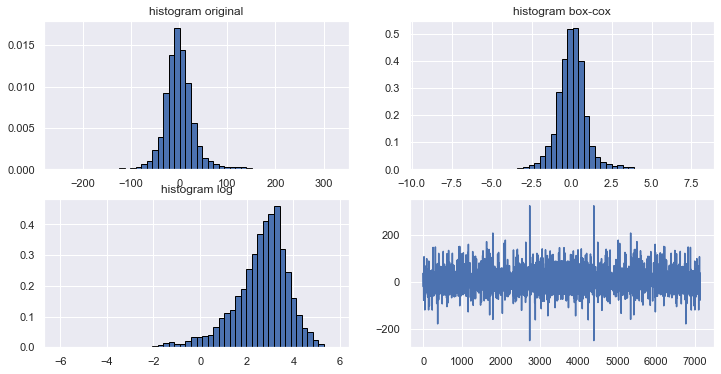

In [461]:
fig, ax = plt.subplots(2, 2,figsize=(12,6), squeeze=False)

ax[0,0].hist(ndif, bins=50, density = True, histtype='bar', ec='black')
ax[0,0].set_title('histogram original')
ax[0,1].hist(kw_boxed, bins=50, density = True, histtype='bar', ec='black')
ax[0,1].set_title('histogram box-cox')
ax[1,0].hist(kw_log, bins=50, density = True, histtype='bar', ec='black')
ax[1,0].set_title('histogram log')
ax[1,1].plot(ndif)

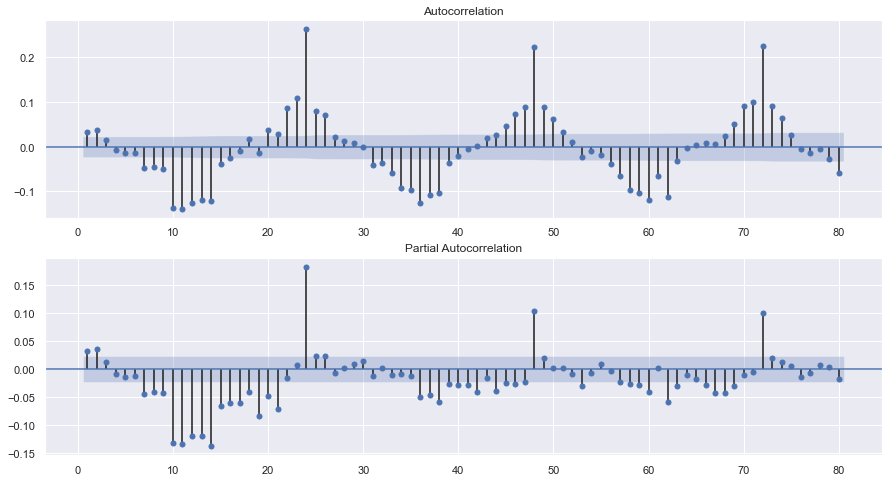

In [463]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), squeeze=False)
x = sm.graphics.tsa.plot_acf(ndif, lags=80, ax=ax[0,0], zero=False)
x = sm.graphics.tsa.plot_pacf(ndif, lags=80, ax=ax[1,0], zero=False)

In [465]:
ptf = preprocessing.PowerTransformer(method='box-cox')
kw_boxed = ptf.fit_transform(df_noMonday['KW'].values.reshape(-1,1))
df_noMonday['KW_box'] = kw_boxed
df_noMonday['KW_log'] = np.lib.scimath.log(df_noMonday['KW'].values)

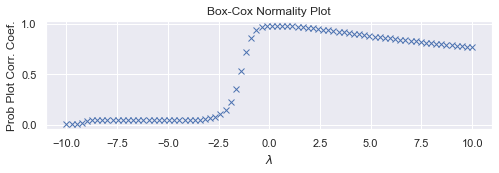

In [466]:
fig, ax = plt.subplots(1, 1, figsize=(8,2), squeeze=False)
prob = sp.stats.boxcox_normplot(df_noMonday['KW'].values, -10, 10, plot=ax[0,0])

**Stationarity** <br/>
adfuller's null hypothesis: time series has unit root <br/>
If a time series has a unit root, it shows a systematic pattern that is unpredictable <br/>
The null hypothesis for is that the data are non-stationary. We want to REJECT the null hypothesis for this test, so we want a p-value of less that 0.05 (or smaller).

In [469]:
sm.tsa.stattools.adfuller(ndif)

(-17.510208101921158,
 4.3390166305144765e-30,
 35,
 7098,
 {'1%': -3.43127162108596,
  '5%': -2.861947283361622,
  '10%': -2.5669867928635224},
 68839.19916196697)

KPSS tests's null hypothesis: observable time series is stationary around a deterministic trend <br/>
a trend-stationary process is a stochastic process from which an underlying trend (function solely of time) can be removed, leaving a stationary process <br/>
The null hypothesis for the KPSS test is that the data are stationary. For this test, we do NOT want to reject the null hypothesis. In other words, we want the p-value to be greater than 0.05 not less than 0.05. <br/>

In [470]:
sm.tsa.stattools.kpss(ndif)

(0.00277989647039125,
 0.1,
 35,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

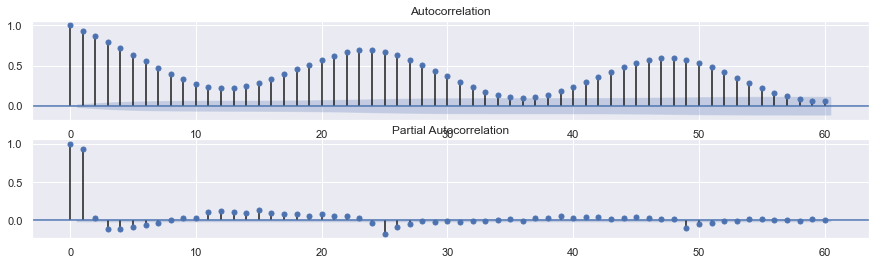

In [122]:
fig, ax = plt.subplots(2, 1, figsize=(15, 4), squeeze=False)
x = sm.graphics.tsa.plot_acf(df_scaled, lags=60, ax=ax[0,0])
x = sm.graphics.tsa.plot_pacf(df_scaled, lags=60, ax=ax[1,0])

#### Decomposition

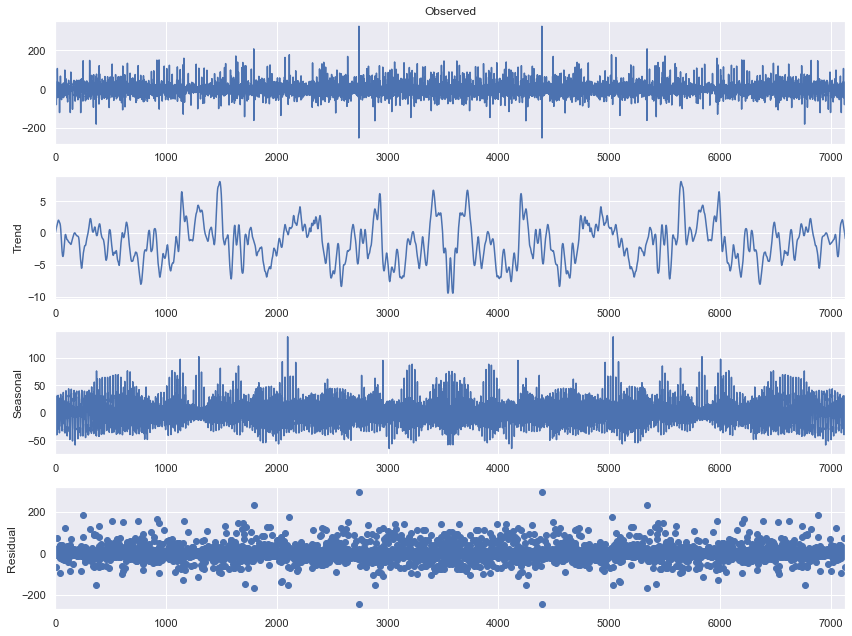

In [471]:
plt.rc('figure',figsize=(12,9))
stl = STL(ndif, period=24, robust=True)
res = stl.fit()
fig = res.plot()

### STL Forecasting

In [648]:
# Combine LOESS with ARIMA
stlf111 = STLForecast(ndif[0:6000], ETSModel, period=6*24)
stlf200 = STLForecast(ndif[0:6000], ARIMA, model_kwargs=dict(order=(3,0,1), trend="c"), period=24)

In [649]:
plt.rc('figure',figsize=(18,4))

stlf_res111 = stlf111.fit()
stlf_res200 = stlf200.fit()

# n_fore = 24 * num of days 
n_fore = 24*5
forecast111 = stlf_res111.forecast(n_fore)
forecast200 = stlf_res200.forecast(n_fore)

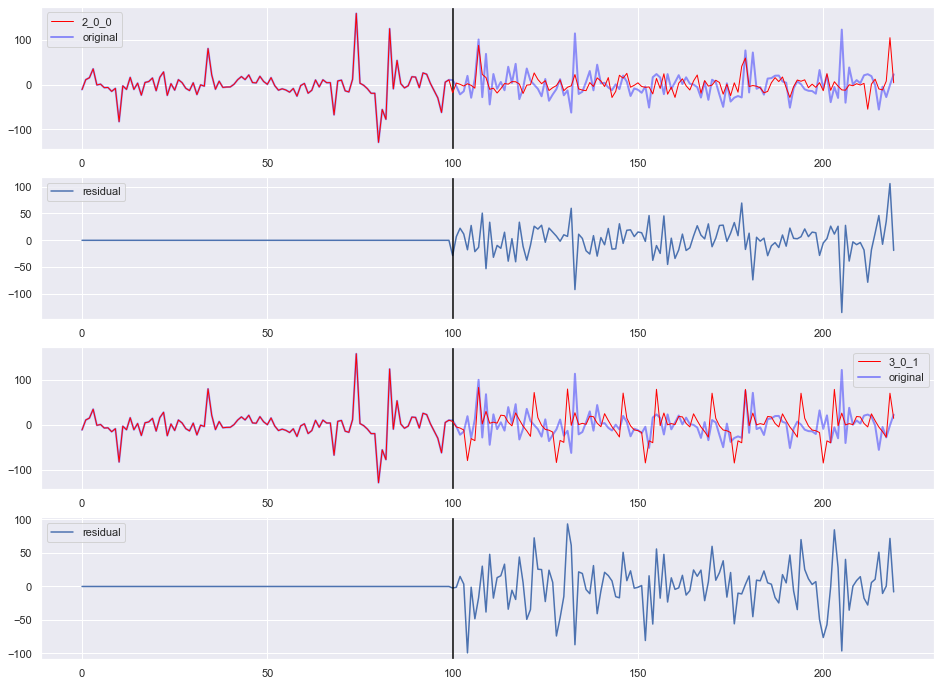

In [650]:
cat111 = np.concatenate((ndif[5900:6000], forecast111))
cat200 = np.concatenate((ndif[5900:6000], forecast200))

fig, ax = plt.subplots(4, 1, figsize=(16,12), squeeze=False)
cnt = 0
#ax[cnt,0].plot(np.concatenate((ndif[5900:6000], forecast111)), color='orange', lw=1, label='1_1_1', zorder=10)
ax[cnt,0].plot(cat111, color='red', lw=1, label='2_0_0', zorder=10)
ax[cnt,0].plot(ndif[5900:6000 + n_fore], color='blue', lw=2, label='original', alpha=0.4)
ax[cnt,0].axvline(100,0,1,color='black')

model = pf.ARIMA(data=df_scaled[0:6000], ar=2, ma=0, target='KW', family=pf.Normal())
ax[cnt,0].legend()
cnt = 1
ax[cnt,0].plot(cat111 - ndif[5900:6000 + n_fore], label='residual')
ax[cnt,0].axvline(100,0,1,color='black')
ax[cnt,0].legend()

cnt = 2
#ax[cnt,0].plot(np.concatenate((ndif[5900:6000], forecast111)), color='orange', lw=1, label='1_1_1', zorder=10)
ax[cnt,0].plot(cat200, color='red', lw=1, label='3_0_1', zorder=10)
ax[cnt,0].plot(ndif[5900:6000 + n_fore], color='blue', lw=2, label='original', alpha=0.4)
ax[cnt,0].axvline(100,0,1,color='black')
ax[cnt,0].legend()
cnt = 3
ax[cnt,0].plot(cat200 - ndif[5900:6000 + n_fore], label='residual')
ax[cnt,0].axvline(100,0,1,color='black')
ax[cnt,0].legend()

In [651]:
print('RMSE111: ', sm.tools.eval_measures.rmse(forecast111, ndif[6000:6000 + n_fore]),
      '\nRMSE200: ', sm.tools.eval_measures.rmse(forecast200, ndif[6000:6000 + n_fore]))

RMSE111:  30.43410637264898 
RMSE200:  35.710612576710446


Ljung-Box's null hypothesis: the residuals from the ARIMA model have no autocorrelation <br/>

In [652]:
print(stlf_res111.summary(),'\n',stlf_res200.summary())

                      STL Decomposition and ETS Results                       
Dep. Variable:                      y   No. Observations:                 6000
Model:                       ETS(ANN)   Log Likelihood              -27980.653
Date:                Sun, 25 Oct 2020   AIC                          55967.305
Time:                        20:38:00   BIC                          55987.404
Sample:                             0   HQIC                         55974.285
                               - 6000   Scale                          657.870
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0008        nan        nan        nan         nan         nan
initial_level       2.2529        nan        nan        nan         nan         nan
Ljung-Box (Q):                  

Residual autocorrelation test <br/>
Durbin-Watson's null hypothesis: there is no serial correlation in the residuals

In [477]:
from statsmodels.stats.stattools import durbin_watson

print(durbin_watson(stlf_res111.result.resid), durbin_watson(stlf_res200.result.resid))

2.204794375993899 2.204794375993899


In [350]:
model = pf.ARIMA(data=df_scaled[0:6000], ar=1, ma=0, target='KW', family=pf.Normal())

In [351]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(1,0,0)                                                                                       
======================================================= ==================================================
Dependent Variable: KW                                  Method: MLE                                       
Start Date: 1                                           Log Likelihood: 5392.833                          
End Date: 7011                                          AIC: -10779.666                                   
Number of observations: 5999                            BIC: -10759.568                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.4776     0.0313     15.2574  0.0      (0.4163 | 0.539)         
AR(1)                                

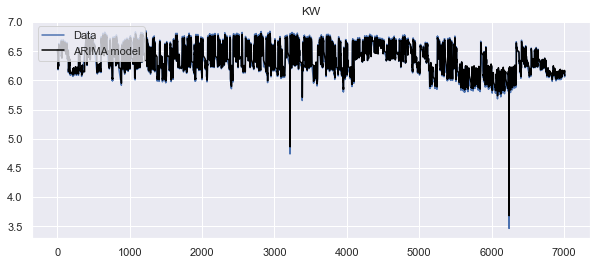

In [263]:
model.plot_fit(figsize=(10,4))

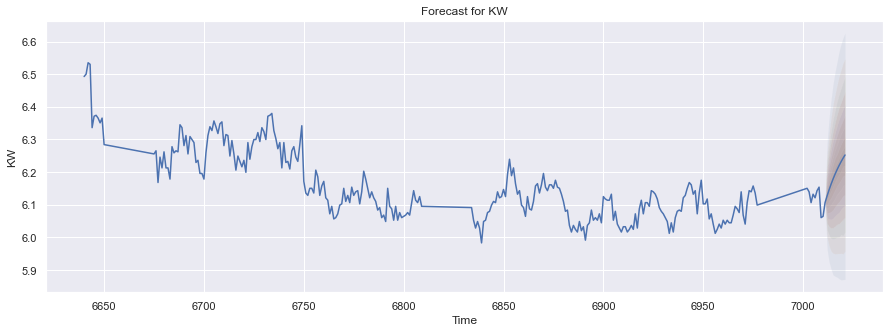

In [266]:
model.plot_predict(h=10,past_values=300,figsize=(15,5))

### AR Model

In [632]:
mdata = df_noMonday['KW'].values
mdata_0 = mdata[0]
mdata_0_log = np.log([mdata_0])
X = np.diff(np.log(mdata))
train, test = X[1:len(X)-24*7*3], X[len(X)-24*7*3:]

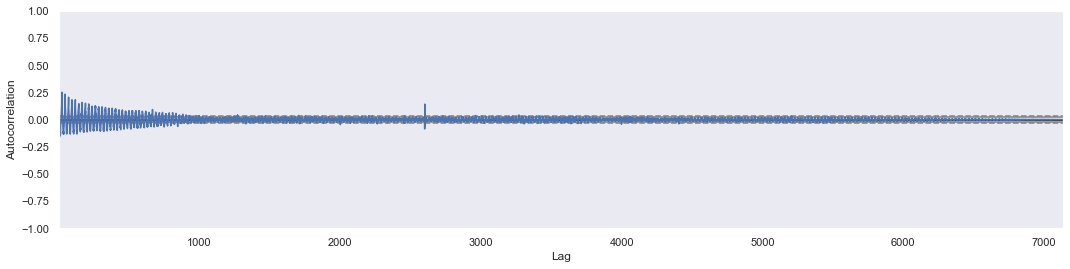

In [654]:
autocorrelation_plot(X)

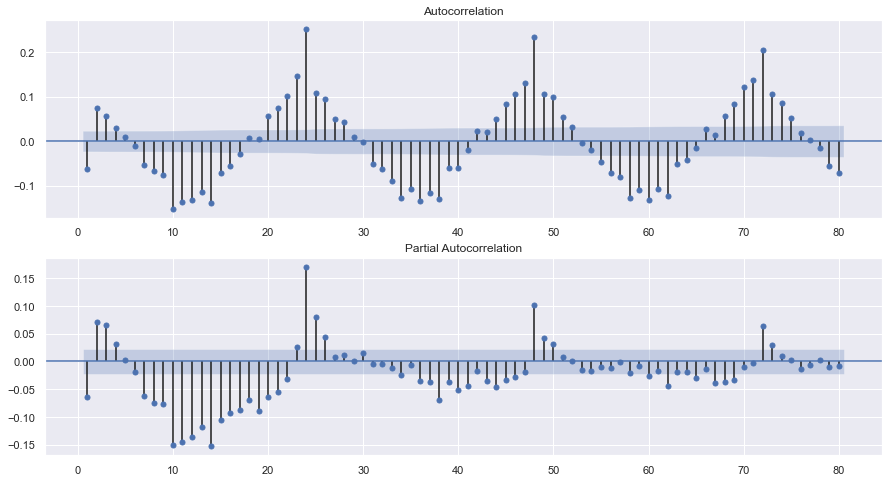

In [655]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8), squeeze=False)
x = sm.graphics.tsa.plot_acf(X, lags=80, ax=ax[0,0], zero=False)
x = sm.graphics.tsa.plot_pacf(X, lags=80, ax=ax[1,0], zero=False)

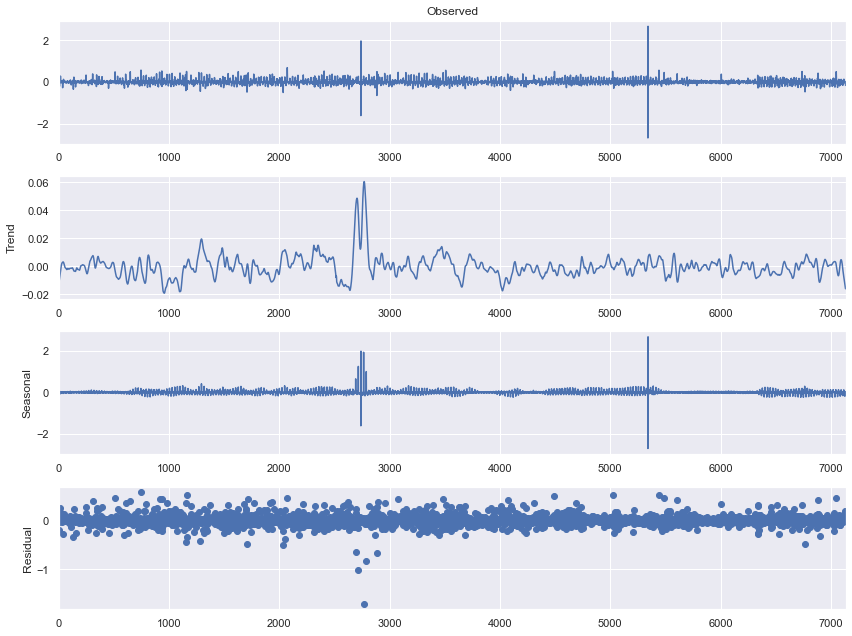

In [639]:
plt.rc('figure',figsize=(12,9))
stl = STL(X, period=24, robust=True)
res = stl.fit()
fig = res.plot()

In [640]:
# train autoregression
model = AutoReg(train, lags=35)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [-9.66176861e-05 -2.58498230e-01 -1.06479829e-01 -7.90997485e-02
 -8.58531758e-02 -8.04216162e-02 -8.31730059e-02 -9.56240203e-02
 -8.62372705e-02 -8.37601966e-02 -1.46712506e-01 -1.49119381e-01
 -1.32986813e-01 -1.19617507e-01 -1.51679502e-01 -1.13183355e-01
 -8.95383949e-02 -8.13640335e-02 -6.96001042e-02 -8.38517058e-02
 -5.83595313e-02 -4.26222605e-02 -3.29736778e-04  7.27430573e-02
  1.78272004e-01  8.74332119e-02  5.33354818e-02  1.66919607e-02
  1.21735735e-02  3.06420571e-03  1.16035417e-02 -2.45467194e-03
  1.72349058e-03 -1.41270308e-02 -2.59196826e-02 -8.02429654e-03]


In [641]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = math.sqrt(metrics.mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=-0.042284, expected=-0.035091
predicted=-0.052749, expected=-0.180126
predicted=-0.022823, expected=-0.019934
predicted=-0.015206, expected=0.000000
predicted=-0.011932, expected=-0.016921
predicted=-0.007530, expected=-0.006849
predicted=-0.000967, expected=-0.049306
predicted=0.011568, expected=0.021429
predicted=0.035572, expected=0.038133
predicted=0.031947, expected=0.142420
predicted=0.021001, expected=-0.014859
predicted=0.028137, expected=-0.024244
predicted=0.023516, expected=0.179249
predicted=0.011406, expected=0.005115
predicted=0.013241, expected=0.020203
predicted=0.015042, expected=-0.035627
predicted=0.009255, expected=0.020514
predicted=0.002721, expected=0.105868
predicted=-0.007442, expected=-0.004577
predicted=-0.006698, expected=-0.216856
predicted=-0.006364, expected=0.030858
predicted=-0.022009, expected=-0.008322
predicted=-0.026228, expected=-0.048512
predicted=-0.016411, expected=-0.026668
predicted=-0.023981, expected=-0.006024
predicted=-0.023658, 

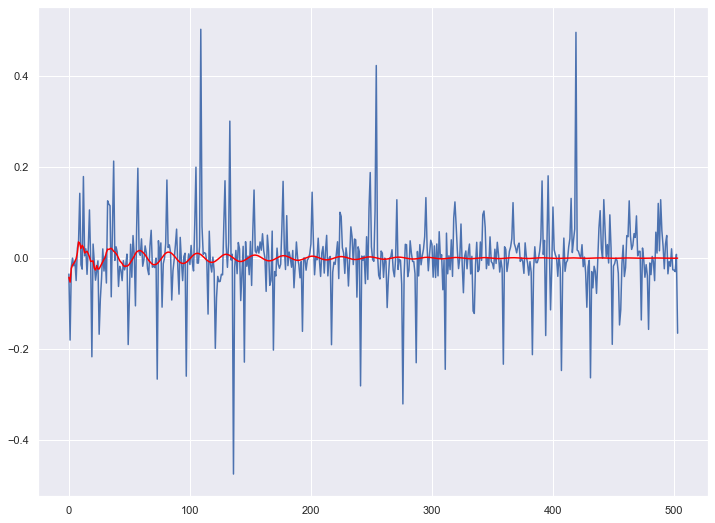

In [642]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [643]:
len(test), len(predictions), len(X), len(df_noMonday['KW'].values)

(504, 504, 7134, 7135)

In [644]:
#transformaing predictions back
df_test = pd.DataFrame()
test = np.append(mdata_0_log, test)
predictions = np.append(mdata_0_log, predictions)

df_test['test'] = test
df_test['test']=(np.exp(df_test['test'].cumsum()))
df_test['predictions'] = predictions
df_test['predictions']=(np.exp(df_test['predictions'].cumsum()))

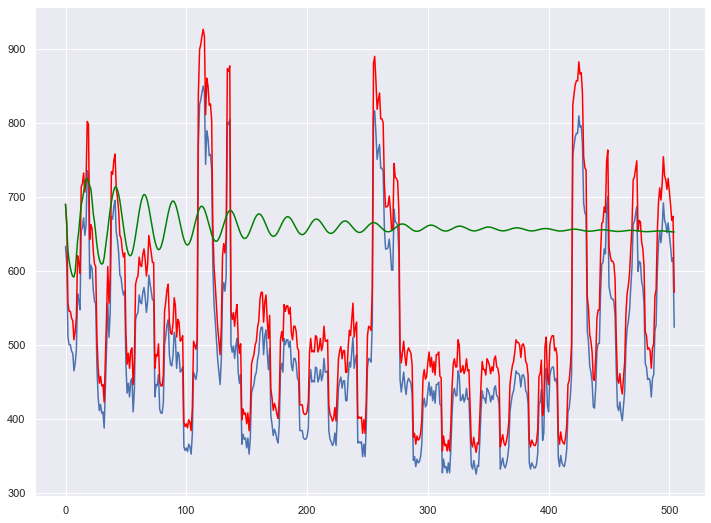

In [645]:
plt.plot(df_noMonday['KW'].values[len(X)-24*7*3:])
plt.plot(df_test['test'], color='red')
plt.plot(df_test['predictions'], color='green')

In [646]:
sm.tools.eval_measures.rmse(df_test['predictions'], df_test['test'])

173.01101372713723

### AUTO-ARIMA

In [661]:
df_autoarima = df_noMonday[['DATETIME','KW']]
df_autoarima.set_index('DATETIME', inplace=True)

In [662]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df_autoarima)

(0.01, False)

In [664]:
df_autoarima.shape

(7135, 1)

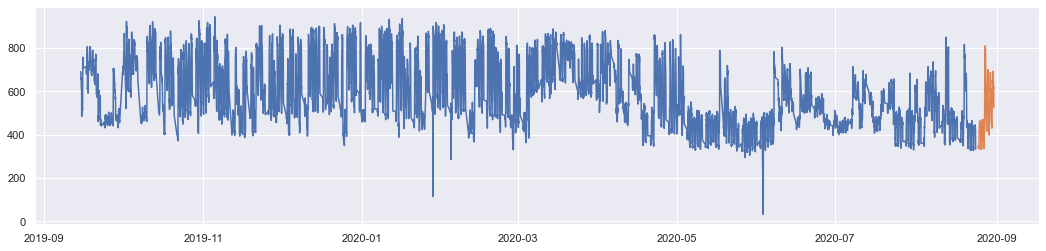

In [675]:
train = df_autoarima[:df_autoarima.shape[0]-24*6] #predict last 6 days
test = df_autoarima[-24*6:]
plt.plot(train)
plt.plot(test)

In [676]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, 
                         start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, 
                        seasonal=True, error_action='warn', trace=True, supress_warning=True, 
                         stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=80603.731, Time=0.21 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=75519.213, Time=2.56 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=9.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=80185.613, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=75327.720, Time=5.43 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=74174.592, Time=18.15 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=74135.043, Time=41.62 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=inf, Time=78.83 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=61.48 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=34.03 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=148.04 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=74159.477, Time=9.12 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=74132.094, Time=62.67 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=74170.638, Time=36.90 sec
 ARIMA(2,1,0)(5,1,0)[12]  

In [677]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 6991
Model:             SARIMAX(2, 1, 0)x(4, 1, 0, 12)   Log Likelihood              -37059.047
Date:                            Mon, 26 Oct 2020   AIC                          74132.094
Time:                                    10:42:04   BIC                          74180.048
Sample:                                         0   HQIC                         74148.621
                                           - 6991                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0672      0.006    -10.609      0.000      -0.080      -0.055
ar.L2         -0.0275      0.012     -2.257      0.024      -0.051      -0.004
ar.S.L12      -0.9489      0.011    -90.344      0.000      -0.969      -0.928
ar.S.L24      -0.5369      0.012    -45.935      0.000      -0.560      -0.514
ar.S.L36      -0.4634      0.011    -40.764      0.000      -0.486      -0.441
ar.S.L48      -0.0762      0.011     -7.243      0.000      -0.097      -0.056
sigma2      2395.7996     14.775    162.156      0.000    2366.842    2424.757
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             73763.36
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [678]:
prediction = pd.DataFrame(arima_model.predict(n_periods=24*6), index=test.index)
prediction.columns = ['predicted_KW']
prediction

,predicted_KW
DATETIME,
2020-08-25 00:00:00,344.317851
2020-08-25 01:00:00,343.364628
2020-08-25 02:00:00,337.919069
2020-08-25 03:00:00,329.390671
2020-08-25 04:00:00,341.391297
...,...
2020-08-30 19:00:00,354.844253
2020-08-30 20:00:00,359.137511
2020-08-30 21:00:00,356.297414


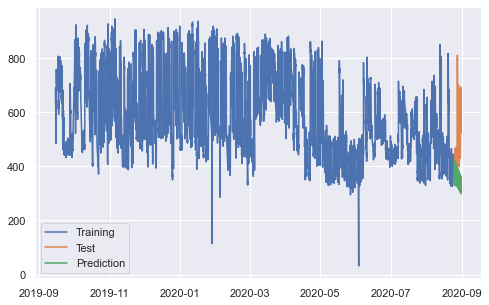

In [679]:
plt.figure(figsize=(8,5))
plt.plot(train, label="Training")
plt.plot(test, label="Test")
plt.plot(prediction, label="Prediction")
plt.legend(loc = 'Left conrner')
plt.show()

In [680]:
test['predicted_KW'] = prediction
metrics.r2_score(test['KW'], test['predicted_KW'])

-1.4824798188711017

### LM-Neural Network

http://cs229.stanford.edu/proj2013/229final.pdf

θ1 Hour of the day <br>
θ2 Day of the week <br>
θ3 Xt−1, Power consumptiont−1 <br>
θ4 Xt−2, Power consumptiont−2 <br>
θ5 Xt−3, Power consumptiont−3 <br>
θ6 ∆X2,1=Xt−2−Xt−1, Derivitive of power consumptiont−1 <br>
θ7 Xt−24, Power consumption at the same time of the previous day <br>
θ8 Arithmetic mean of the power consumption for the same time of the day for all previous days

#### Data setup

In [932]:
feature_columns = ['DATETIME', 'KW', 'KW_t-1', 'KW_t-2', 'KW_t-3', 'KW_t-24', 'KW_derivative_1', 'KW_sametime_mean', 'hour_of_day', 'day_of_week']

In [933]:
#helper functions
def exists_t_n(row, n, col_name, col_name_n):
    if row[col_name] - dt.timedelta(hours=n) == row[col_name_n]:
        return True
    else:
        return np.nan
    
def previous_day(df, time_col, time, ret_col):
    try:
        #iloc[0] makes empty series error out so we return np.nan
        return df[df[time_col] == time - dt.timedelta(days=1)].iloc[0][ret_col]
    except:
        return np.nan

In [934]:
#building features from original df
df_nn_ = df[['DATETIME', 'KW']]
df_nn = df_nn_[1:]

#1.a building features 3, 4, 5
df_nn['DATETIME_t-1'] = df_nn_['DATETIME'].shift(periods=1)
df_nn['DATETIME_t-2'] = df_nn_['DATETIME'].shift(periods=2)
df_nn['DATETIME_t-3'] = df_nn_['DATETIME'].shift(periods=3)
df_nn['KW_t-1'] = df_nn_['KW'].shift(periods=1)
df_nn['KW_t-2'] = df_nn_['KW'].shift(periods=2)
df_nn['KW_t-3'] = df_nn_['KW'].shift(periods=3)
#1.b keeping only the data that has accompanying data for t-3, t-2, t-1 period
df_nn['DATETIME_t-3_exists'] = df_nn.apply(lambda row: exists_t_n(row, 3, 'DATETIME', 'DATETIME_t-3'), axis=1)
df_nn['DATETIME_t-2_exists'] = df_nn.apply(lambda row: exists_t_n(row, 2, 'DATETIME', 'DATETIME_t-2'), axis=1)
df_nn['DATETIME_t-1_exists'] = df_nn.apply(lambda row: exists_t_n(row, 1, 'DATETIME', 'DATETIME_t-1'), axis=1)
df_nn.dropna(inplace=True)

#2 building feature 6
df_nn['KW_derivative_1'] = df_nn['KW_t-2'] - df_nn['KW_t-1']

#3 building feature 1, 8
df_nn['hour_of_day'] = df_nn.DATETIME.dt.hour
df_nn['KW_sametime_mean'] = df_nn.groupby(['hour_of_day'])['KW'].transform(lambda x: x.mean())

#4 building feature 7
df_nn['KW_t-24'] =  [previous_day(df_nn, 'DATETIME', df_nn.iloc[i]['DATETIME'], 'KW') for i in range(df_nn.shape[0])]
df_nn.dropna(inplace=True)

#5 building feature 7
df_nn['day_of_week'] = df_nn.DATETIME.dt.weekday

df_nn = df_nn[feature_columns]

In [935]:
df_nn = df_nn[feature_columns]

In [936]:
df_nn

,DATETIME,KW,KW_t-1,KW_t-2,KW_t-3,KW_t-24,KW_derivative_1,KW_sametime_mean,hour_of_day,day_of_week
28,2019-09-16 10:00:00,488.880000,8.400000,485.520000,451.920000,493.920000,477.120000,618.005699,10,0
29,2019-09-16 11:00:00,483.840000,488.880000,8.400000,485.520000,514.080000,-480.480000,648.878814,11,0
30,2019-09-16 12:00:00,455.280000,483.840000,488.880000,8.400000,525.840000,5.040000,670.058117,12,0
31,2019-09-16 13:00:00,493.920000,455.280000,483.840000,488.880000,530.880000,28.560000,681.320348,13,0
32,2019-09-16 14:00:00,551.040000,493.920000,455.280000,483.840000,527.520000,-38.640000,682.395608,14,0
...,...,...,...,...,...,...,...,...,...,...
8331,2020-08-31 16:00:00,525.840027,549.359986,549.359986,524.159974,663.599976,0.000000,677.554287,16,0
8332,2020-08-31 17:00:00,504.000000,525.840027,549.359986,549.359986,651.840027,23.519959,661.485349,17,0
8333,2020-08-31 18:00:00,535.919983,504.000000,525.840027,549.359986,665.280030,21.840027,671.668870,18,0
8334,2020-08-31 19:00:00,517.440003,535.919983,504.000000,525.840027,648.479981,-31.919983,660.537909,19,0


In [937]:
features = ['KW_t-1', 'KW_t-2', 'KW_t-3', 'KW_t-24', 'KW_derivative_1', 'KW_sametime_mean', 'hour_of_day', 'day_of_week']
predict_days = 24*3
train_up_to = df_nn.shape[0] - predict_days
X_train = df_nn.loc[:train_up_to][features].T.to_numpy()
X_test = df_nn.loc[:train_up_to]['KW'].values.reshape(-1, 1).T
Y_train = df_nn.loc[train_up_to:][features].T.to_numpy()
Y_test = df_nn.loc[train_up_to:]['KW'].values.reshape(-1, 1).T

In [938]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8, 7551), (1, 7551), (8, 425), (1, 425))

#### NN model
8 inputs and 1 output
two hidden layers, each with 3 neurons

In [1004]:
net = prn.CreateNN([8,3,1])

In [1005]:
net = prn.train_LM(X_train,X_test,net,verbose=True,k_max=50,E_stop=1e-5)

Iteration:  0 		Error:  12767.73281308375 	scale factor:  3.0
Iteration:  1 		Error:  242.5806008449479 	scale factor:  0.3
Iteration:  2 		Error:  180.4331178847631 	scale factor:  3.0
Iteration:  3 		Error:  42.37352665876282 	scale factor:  0.3
Iteration:  4 		Error:  38.838972481395984 	scale factor:  0.3
Iteration:  5 		Error:  36.62063358927427 	scale factor:  0.03
Iteration:  6 		Error:  27.225388861331243 	scale factor:  0.03
Iteration:  7 		Error:  26.80086468744763 	scale factor:  0.03
Iteration:  8 		Error:  26.487264833595212 	scale factor:  0.03
Iteration:  9 		Error:  26.469185280053658 	scale factor:  0.3
Iteration:  10 		Error:  26.454281349834204 	scale factor:  0.3
Iteration:  11 		Error:  26.440275876529096 	scale factor:  0.3
Iteration:  12 		Error:  26.426862742028494 	scale factor:  0.3
Iteration:  13 		Error:  26.414015030739023 	scale factor:  0.3
Iteration:  14 		Error:  26.40173862112754 	scale factor:  0.3
Iteration:  15 		Error:  26.39003689555722 	scale fac

#### Understanding the output

In [1006]:
y = prn.NNOut(X_train,net)
ytest = prn.NNOut(Y_train,net)

In [1007]:
print(
f'r2_score: {metrics.r2_score(X_test.T, y)} \n\
RMSE: {math.sqrt(metrics.mean_squared_error(X_test.T, y))} \n\
MAE: {metrics.mean_absolute_error(X_test.T, y)}'
)

r2_score: 0.8722542480391992 
RMSE: 55.06795335388391 
MAE: 28.60272233033177


In [1008]:
print(
f'r2_score: {metrics.r2_score(Y_test.T, ytest)} \n\
RMSE: {math.sqrt(metrics.mean_squared_error(Y_test.T, ytest))} \n\
MAE: {metrics.mean_absolute_error(Y_test.T, ytest)}'
)

r2_score: 0.7779231316996109 
RMSE: 52.75201544562257 
MAE: 24.73321126779448


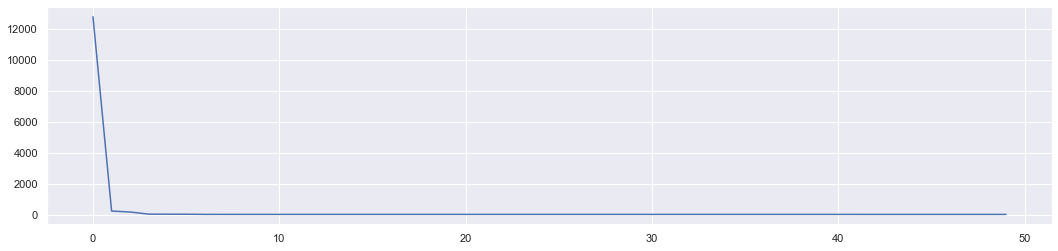

In [1009]:
plt.plot(net['ErrorHistory'])

In [1010]:
plot_train = pd.DataFrame(df_nn.loc[:train_up_to]['DATETIME'].values, columns=['DATETIME'])
plot_train['predicted_KW'] = y
plot_train['actual_KW'] = X_test.T
plot_train.set_index('DATETIME', inplace=True)

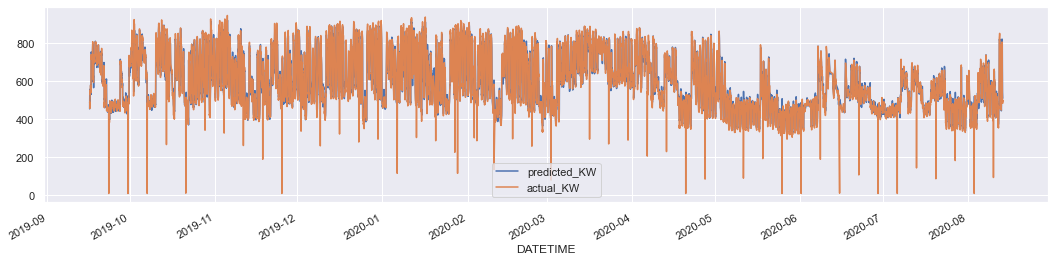

In [1011]:
plot_train.plot()

In [1012]:
plot_test = pd.DataFrame(df_nn.loc[train_up_to:]['DATETIME'].values, columns=['DATETIME'])
plot_test['predicted_KW'] = ytest
plot_test['actual_KW'] = Y_test.T
plot_test['residuals'] = plot_test['actual_KW'] - plot_test['predicted_KW']
plot_test.set_index('DATETIME', inplace=True)

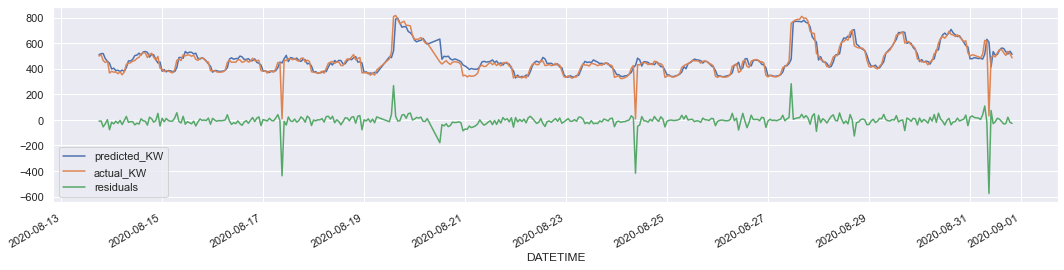

In [1013]:
plot_test.plot()

In [1014]:
#residuals
plot_test[plot_test['residuals'] > 100]

,predicted_KW,actual_KW,residuals
DATETIME,,,
2020-08-19 14:00:00,540.015826,808.080018,268.064192
2020-08-27 11:00:00,473.334953,756.000000,282.665047
2020-08-31 07:00:00,513.065078,621.599976,108.534898


In [1015]:
print(
f" \
min: {residuals.abs().min()}\n \
max: {residuals.abs().max()}\n \
mean: {residuals.abs().mean()} \
"
)

 min: 0.03856640865740246
 max: 511.4168327092519
 mean: 25.91253021272974 


In [1016]:
plot_test.describe()

,predicted_KW,actual_KW,residuals
count,425.000000,425.000000,425.000000
mean,471.881389,464.466636,-7.414753
std,99.787921,112.072467,52.289866
min,327.594756,8.400000,-575.504329
25%,406.784626,393.119996,-18.292828
50%,454.298471,450.239991,-5.235006
75%,506.029209,498.959992,10.874834
max,795.229275,816.479981,282.665047


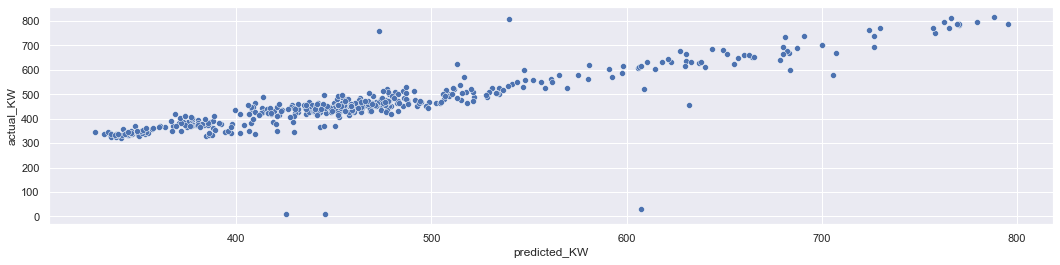

In [1017]:
plot_size = (5, 5)
sns.scatterplot(x='predicted_KW', y='actual_KW', data=plot_test)

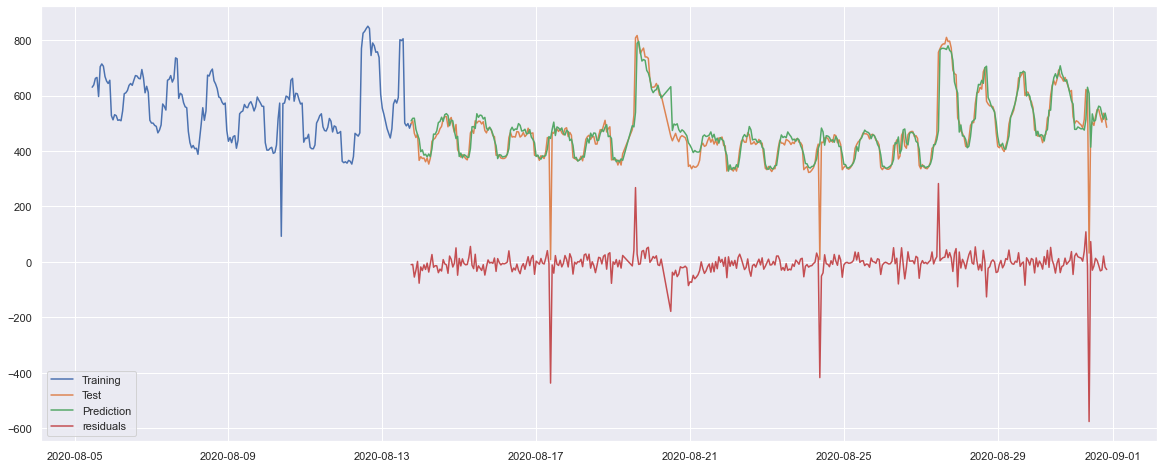

In [1025]:
plt.figure(figsize=(20,8))
plt.plot(plot_train['actual_KW'][-200:], label="Training")
plt.plot(plot_test['actual_KW'], label="Test")
plt.plot(plot_test['predicted_KW'], label="Prediction")
plt.plot(plot_test['residuals'], label="residuals")
plt.legend(loc = 'best')
plt.show()